In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("./Train.csv")

In [3]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [6]:
data=data.rename(columns={"Var_1":"Category"})

In [7]:
data=data.drop(columns="ID")

In [8]:
data["Age"].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88])

In [9]:
data.duplicated().sum()

417

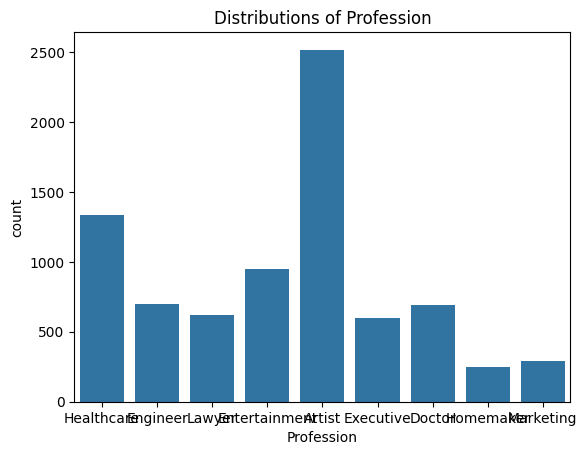

In [10]:
sns.countplot(x='Profession',data=data)
plt.title("Distributions of Profession")
plt.xticks
plt.show()

In [11]:
data.isnull().sum()

,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Category,76
Segmentation,0


In [12]:
data["Ever_Married"].fillna(data["Ever_Married"].mode()[0],inplace=True)

In [13]:
data["Graduated"].fillna(data["Graduated"].mode()[0],inplace=True)

In [14]:
data["Profession"].fillna(data["Profession"].mode()[0],inplace=True)

In [15]:
data["Work_Experience"].fillna(data["Work_Experience"].mode()[0],inplace=True)

In [16]:
data["Family_Size"].fillna(data["Family_Size"].mode()[0],inplace=True)

In [17]:
data["Category"].fillna(data["Category"].mode()[0],inplace=True)

In [18]:
data.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Category,0
Segmentation,0


<Axes: xlabel='Age'>

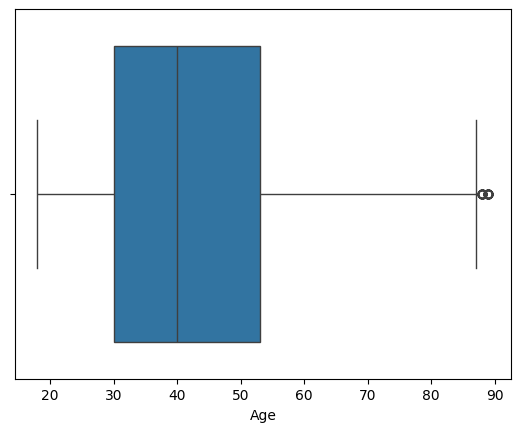

In [19]:
sns.boxplot(x=data["Age"])

In [20]:
q1=data["Age"].quantile(0.25)
print("q1:",q1)
q3=data["Age"].quantile(0.75)
print("q3:",q3)
IQR=q3-q1
print("IQR:",IQR)
ll=q1-(IQR*1.5)
print("ll:",ll)
ul=q3+(IQR*1.5)
print("ul:",ul)

q1: 30.0
q3: 53.0
IQR: 23.0
ll: -4.5
ul: 87.5


In [21]:
data[(data["Age"]<ll) | (data["Age"]>ul)]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
321,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,Cat_6,A
395,Female,Yes,89,No,Lawyer,3.0,High,1.0,Cat_6,D
699,Male,Yes,88,No,Executive,0.0,Low,1.0,Cat_6,A
753,Female,Yes,88,No,Lawyer,0.0,High,2.0,Cat_6,B
943,Male,Yes,88,Yes,Lawyer,1.0,Low,2.0,Cat_6,B
...,...,...,...,...,...,...,...,...,...,...
7262,Male,Yes,89,No,Lawyer,0.0,Low,2.0,Cat_6,A
7778,Female,Yes,88,Yes,Lawyer,1.0,High,2.0,Cat_6,C
7864,Male,Yes,88,Yes,Artist,0.0,High,2.0,Cat_6,C
7866,Male,Yes,88,Yes,Marketing,0.0,High,2.0,Cat_6,C


In [22]:
data["Gender"].replace({"Male":[1],"Female":[0]},inplace=True)

In [23]:
data["Ever_Married"].replace({"No":0,"Yes":1},inplace=True)

In [24]:
data["Graduated"].replace({"No":0,"Yes":1},inplace=True)

In [25]:
data["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [26]:
data["Profession"].replace({"Healthcare":0,"Engineer":1,'Lawyer':2, 'Entertainment':3, 'Artist':4,
       'Executive':5, 'Doctor':6, 'Homemaker':7, 'Marketing':8},inplace=True)

In [27]:
data["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [28]:
data["Spending_Score"].replace({"Low":0,"Average":1,"High":2},inplace=True)

In [29]:
data["Category"].unique()


array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [30]:
data["Category"].replace({'Cat_4':3, 'Cat_6':5, 'Cat_7':6, 'Cat_3':2, 'Cat_1':0, 'Cat_2':1, 'Cat_5':4},inplace=True)

In [31]:
data["Segmentation"].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [32]:
data["Segmentation"].replace({"A":0,"B":1,"C":2,"D":3},inplace=True)

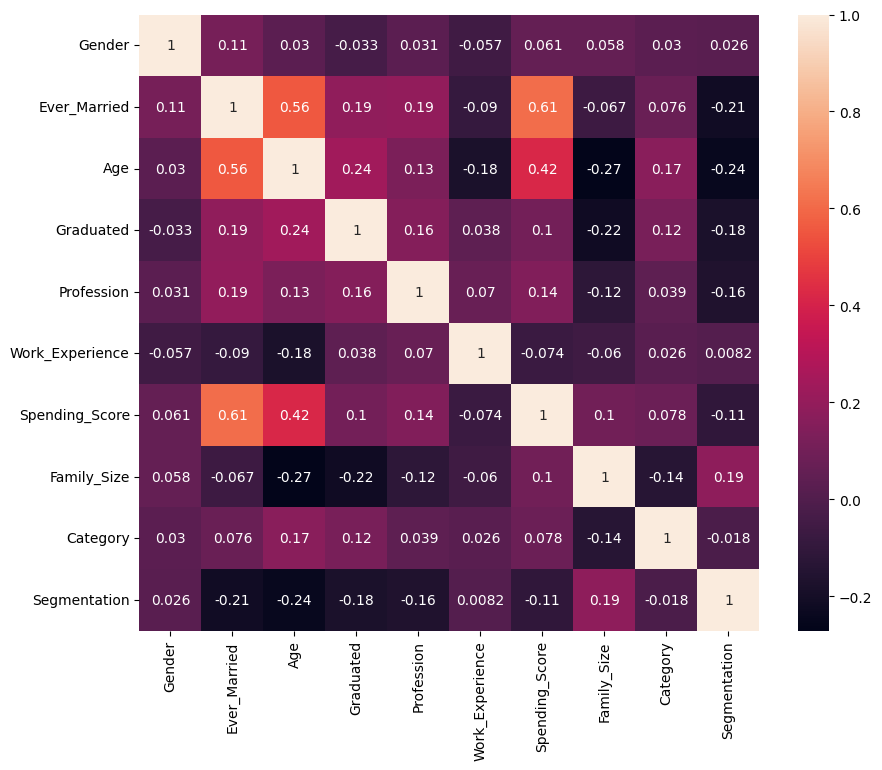

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [34]:
data.dropna(inplace=True)

In [35]:
x=data[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category']]
y=data["Segmentation"]

In [36]:
x

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,1,0,22,0,0,1.0,0,4.0,3
1,0,1,38,1,1,1.0,1,3.0,3
2,0,1,67,1,1,1.0,0,1.0,5
3,1,1,67,1,2,0.0,2,2.0,5
4,0,1,40,1,3,1.0,2,6.0,5
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,4,0.0,0,7.0,0
8064,1,0,35,0,5,3.0,0,4.0,3
8065,0,0,33,1,0,1.0,0,1.0,5
8066,0,0,27,1,0,1.0,0,4.0,5


In [37]:
y

,Segmentation
0,3
1,0
2,1
3,1
4,0
...,...
8063,3
8064,3
8065,3
8066,1


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
estimator=SVC()
param_grid={"C":[7],"kernel":["rbf"]}
model1=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model1.fit(x_train,y_train)
model1.best_params_





{'C': 7, 'kernel': 'rbf'}

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


svm=SVC(C=3,kernel="rbf")
svm.fit(x_train,y_train)

ŷ_train=svm.predict(x_train)
ŷ_test=svm.predict(x_test)
print("train accuracy",accuracy_score(y_train,ŷ_train))
print("test accuracy",accuracy_score(y_test,ŷ_test))
print("CV",cross_val_score(svm,x_train,y_train,cv=5,scoring="accuracy").mean())

train accuracy 0.46637744034707157
test accuracy 0.46158612143742256
CV 0.46312251184407255


In [48]:
cm=confusion_matrix(y_test,ŷ_test)
cm

array([[187,  42,  74,  88],
       [123,  54, 151,  41],
       [ 75,  50, 202,  53],
       [114,  30,  28, 302]])

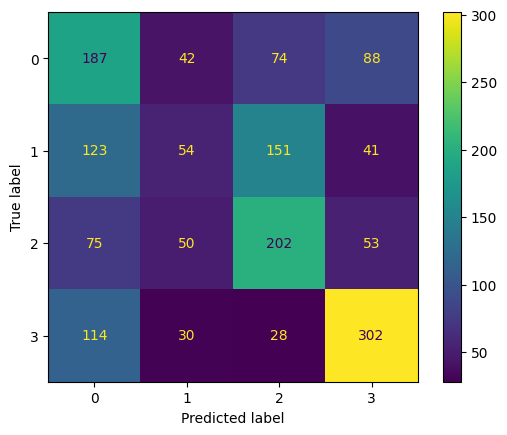

In [49]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [50]:
print(classification_report(y_test,ŷ_test))

              precision    recall  f1-score   support

           0       0.37      0.48      0.42       391
           1       0.31      0.15      0.20       369
           2       0.44      0.53      0.48       380
           3       0.62      0.64      0.63       474

    accuracy                           0.46      1614
   macro avg       0.44      0.45      0.43      1614
weighted avg       0.45      0.46      0.45      1614

